In [3]:
#%matplotlib inline
#import ma
import shutil
import os
from joblib import dump, load
import urllib3
import certifi
from Bio import SeqIO
import Bio
from glob import glob
import json
from IPython import display
import pandas as pd
import numpy as np
import networkx as nx
from collections import OrderedDict

import matplotlib.pyplot as plt
import seaborn as sns
import re
from Bio import Phylo

In [2]:
from Bio.Align.Applications import ClustalwCommandline
clustalw_cline = ClustalwCommandline("clustalw",  align = 'True', tree = 'True', infile="data/major/hivevo_p4_V3.fasta", output = 'FASTA', outfile = 'data/clustal_output/hivevo_p4_V3_major.fasta', type = 'DNA')
stdout, stderr = clustalw_cline()
#print(clustalw_cline)

In [31]:
!fasttree -nt < data/clustal_output/hivevo_p4_V3_major.fasta > data/trees/hivevo_p4_V3_major_ft.nwk

FastTree Version 2.1.10 Double precision (No SSE3)
Alignment: standard input
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jukes-Cantor, CAT approximation with 20 rate categories
Initial topology in 0.00 seconds
Refining topology: 12 rounds ME-NNIs, 2 rounds ME-SPRs, 6 rounds ML-NNIs
Total branch-length 0.250 after 0.00 sec
ML-NNI round 1: LogLk = -1028.740 NNIs 1 max delta 2.03 Time 0.01
Switched to using 20 rate categories (CAT approximation)
Rate categories were divided by 0.691 so that average rate = 1.0
CAT-based log-likelihoods may not be comparable across runs
Use -gamma for approximate but comparable Gamma(20) log-likelihoods
ML-NNI round 2: LogLk = -986.676 NNIs 0 max delta 0.00 Time 0.01
Turning off heuristics for final round of ML NNIs (converged)
ML-NNI round 3: LogLk = -986.652 NNIs 0 max delta 0.00 Time 0.01 (final)
Optimize a

In [5]:
def getrid_dnd(patient_str):
    '''Void func converting .dnd file to .nwk'''
    with open('data/major/'+patient_str+'.dnd') as dnd, open('data/trees/'+patient_str+'_major'+'.nwk','w') as nwk:
        row = ''
        for line in dnd:
            row += line.rstrip()
        nwk.write(row)

patient_str = 'hivevo_p4_V3'
getrid_dnd(patient_str)

In [6]:
!cat data/trees/hivevo_p4_V3_major.nwk

((((((days_93_frequency_79%:0.00000,reference:0.00000):0.00472,days_562_frequency_25%:0.00639):0.01840,days_1142_frequency_26%:0.01771):0.03148,(days_1963_frequency_50%:0.01131,days_3069_frequency_13%:0.03313):0.04005):0.01241,days_1577_frequency_27%:0.01849):0.00095,days_2474_frequency_68%:0.01328,days_2758_frequency_64%:0.02839);

### ClustalW tree

In [5]:
Tree = Phylo.read('data/trees/hivevo_p4_V3_major.nwk', 'newick')
#Tree.ro
#print(Tree)

In [6]:
Tree.root_with_outgroup('reference')
Tree.as_phyloxml()

Phylogeny(rooted=True)

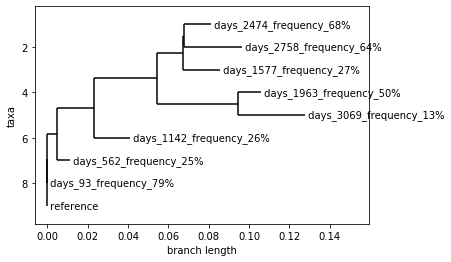

In [7]:
Phylo.draw(Tree)

In [8]:
for clade in list(Tree.find_clades()):
    if clade.name == 'None':
        Tree.collapse(target = clade)

In [12]:
#fig = plt.figure(figsize = (15,18))
Phylo.draw_ascii(Tree)
#plt.show()

                             _____ days_2474_frequency_68%
                            |
                        ____|___________ days_2758_frequency_64%
                       |    |
           ____________|    |______ days_1577_frequency_27%
          |            |
          |            |                ____ days_1963_frequency_50%
   _______|            |_______________|
  |       |                            |_____________ days_3069_frequency_13%
 ,|       |
 ||       |______ days_1142_frequency_26%
 ||
 ||__ days_562_frequency_25%
_|
 | days_93_frequency_79%
 |
 | reference



### Fasttree tree

In [13]:
Tree = Phylo.read('data/trees/hivevo_p4_V3_major_ft.nwk', 'newick')
#Tree.ro
#print(Tree)

In [14]:
Tree.root_with_outgroup('reference')
#Tree.as_phyloxml()

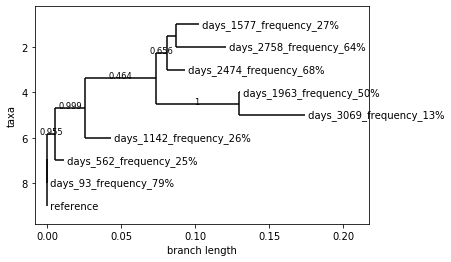

In [15]:
Phylo.draw(Tree)

In [16]:
def clade_names_fix(tree):
    for idx, clade in enumerate(tree.find_clades()):
        if not clade.name:
            clade.name=str(idx)

clade_names_fix(Tree)
G = Phylo.to_networkx(Tree)
nx.write_graphml(G, 'data/graphml/hivevo_p4_V3_major.graphml')

In [38]:
G = nx.read_graphml('data/graphml/hivevo_p4_V3_major.graphml')

source = '0'
dist_dict = nx.shortest_path_length(G, '0')

import operator 
target = max(dist_dict.items(), key=operator.itemgetter(1))[0]

graph_path = nx.shortest_simple_paths(G, source, target)

In [39]:
lst_path = list(graph_path)
lst_path

[['0', '1', '2', '3', '4', '5', '6', 'days_1577_frequency_27%']]

In [49]:
G.adj['4']

AtlasView({'5': {'weight': 0.007554966}, '10': {'weight': 0.056138678}})

### Muscle

### Just trying to see hydrophobicity

In [67]:
!cat data/major/hivevo_p4_V3.fasta

>days_93_frequency_79%
GTAGTATCAACCCAACTGTTGTTAAATGGCAGCCTAGCAGAAGAAGGGGTAGTAGTTAGATCTGACAATTTCTCAAACAATGCTAAAACCATCATAGTACAGTTGCACAAAGCTGTAGAAATTAATTGCACAAGACCCAGCAACAATACAAGCAAAGGTATACATATGGGACCAGGGAAAGCATTTTATACAACAGAAAAAATAATAGGAGATATAAGACAAGCACATTGTAACATTAGTAAAGAGAAATGGAACGACACTTTAAGACAGATAGCTATAAAATTAAGAGCACAATTTCCGAGTAAAACAATAATCTTTGATAAATCCTCAGGAGGGGACCTAGAAATTGTAACACACAGT
>days_562_frequency_25%
GTAGTATCAACCCAACTATTGTTAAATGGCAGCCTAGCAGAAGAAGGGGTAGTAGTTAGATCTGACAATTTCTCAAACAATGCTAAAACCATCATAGTACAGTTGCACAAAGCTGTAGAAATTAATTGCACAAGACCCAGCAACAATACAAGCAAAGGTATACATATGGGACCAGGGAAAGCATTTTATACAACAGAAAGAATAATAGGAGATATAAGACAAGCACATTGTAACATTAGTAAAGAGAAATGGAACGACACTTTAAGACAGATAGCTATAAAATTAAGAGCACAATTTCCGAATAAAACAATAATCTTTGATAAACCCTCAGGAGGGGACCTAGAAATTGTAACACACAGT
>days_1142_frequency_26%
GTAGTATCAACTCAACTGTTGTTAAATGGCAGTCTAGCAGAAGAAGAGATAGTAATTAGATCTGACAATTTCTCAAACAATGCTAAAACCATCATAGTACAGTTGCACAAAGCTGTAGAAATTAATTGCACAAGACCCAGCAACAATACAAGCAAAGGTATACATATGGGACCAGGGAGAGCATTTTATACAACAGAAAAAATAAT

In [99]:
def read_fast(path):
    lst_dict = []
    with open(path) as fasta:
        i = 1
        for line in fasta:
            if bool(i%2):
                if line.find('reference') == -1:
                    lst_dict.append({'num':i//2+1})
                    lst_dict[-1]['desc'] = (line.replace('>','')).rstrip()
                    #print(i)
                    i+=1
                else:
                    #print(dict_seq)
                    lst_dict.append({'num':i//2+1})
                    lst_dict[-1]['desc'] = 'reference'
                    i+=1
            else:
                lst_dict[-1]['seq'] = line.rstrip()
                i+=1
    return lst_dict

haplo = read_fast('data/major/hivevo_p4_V3.fasta')

In [102]:
# Making lists

lst_desc = []
lst_seq = []
for dct in haplo:
    lst_desc.append(dct['desc'])
    lst_seq.append(dct['seq'])
lst_desc.insert(0 , lst_desc.pop(-1))
lst_seq.insert(0, lst_seq.pop(-1))
#print(*lst_desc)
#print(*lst_seq)